In [ ]:
#Load libraries (delete ones not used)
library(tidyverse)
library(ggplot2)
library(repr)
library(corrplot)
library(rsample)
library(mltools)
library(caret)

library(readr)
library(dplyr)
library(reshape)
library(GGally)
library(corrplot)
library(glmnet)
library(pROC)

library(infer)
library(cowplot)
library(broom)
library(faux)

## Prediction of Wine Quality
**STAT 301 Group 2:** Yuechang Liu, Anne Nguyen, Maggie Ruan <br>
**Date:** Dec 16, 2023

### Introduction

The data set selected is about red and white variants of the Portuguese "Vinho Verde" wine and is found at the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/186/wine+quality). The data set was created by Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis. As the data is separated into two files by wine colour, our group decided to only focus on red wine based on our interest. 

The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification entity (CVRVV). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis [Cortez et al., 2009].

There are 12 recorded variables, 11 of which are are physicochemical qualities of the wine
thay are contineous variables based on physicochemical tests:
   >+ 1 - fixed acidity
   >+ 2 - volatile acidity
   >+ 3 - citric acid
   >+ 4 - residual sugar
   >+ 5 - chlorides
   >+ 6 - free sulfur dioxide
   >+ 7 - total sulfur dioxide
   >+ 8 - density
   >+ 9 - pH
   >+ 10 - sulphates
   >+ 11 - alcohol

For the physicochemical qualities, the majority of the variables refer to the amount of the named variable in the wine while pH is a measure of the acidity/basicity of the wine, density is a measure of the concentration of the wine, fixed acidity is the amount of acids originating from the grapes, and volatile acidity refers to the amount of acid from microbial metabolism. 
   >+ 12 - quality (score between 0 and 10)

The data was gathered based on sensory data that each sample was evaluated by a minimum of three sensory assessors (using blind tastes), grade the wine quality between 0 (very bad) and 10 (very excellent) and final score was given by the median of these evaluations.

Thus, the random variable of interest is the wine quality score. Exploratory data analysis would include all physicochemical variables in the data set as explanatory variables and depending on whether there are high correlation, multicollinearity, a subset of those variables may be selected as the explanatory variables in the main analysis. Using the data, we would like to build a regression model that can predict the quality rating of red wine based on its chemical properties with the highest accuracy. As a result, this project aims to answer:
>+ Using the model selection method, how well do the selected explanatory variables predict the wine quality?

### Exploratory Data Analysis

First, the data is imported and named as `wine_red`. Counts of observation and missing values were examied to clean the data into a tidy format.

In [15]:
#Read the dataset from the web into R
wine_red <- read_delim("https://raw.githubusercontent.com/a-nguyen-1/STAT301-Project/main/data/winequality-red.csv")
head(wine_red)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [ ]:
#Examine the counts of observations, levels, missing values
data.frame(Total_observations = nrow(wine_red),
           Missing_values = sum(is.na(wine_red)))

In [16]:
#Summary statistics of quantitative variables
wine_summary <- as.data.frame(sapply(wine_red, summary))
wine_summary

Total_observations,Missing_values
<int>,<int>
1599,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,4.600000,0.1200000,0.0000000,0.900000,0.01200000,1.00000,6.00000,0.9900700,2.740000,0.3300000,8.40000,3.000000
1st Qu.,7.100000,0.3900000,0.0900000,1.900000,0.07000000,7.00000,22.00000,0.9956000,3.210000,0.5500000,9.50000,5.000000
Median,7.900000,0.5200000,0.2600000,2.200000,0.07900000,14.00000,38.00000,0.9967500,3.310000,0.6200000,10.20000,6.000000
Mean,8.319637,0.5278205,0.2709756,2.538806,0.08746654,15.87492,46.46779,0.9967467,3.311113,0.6581488,10.42298,5.636023
3rd Qu.,9.200000,0.6400000,0.4200000,2.600000,0.09000000,21.00000,62.00000,0.9978350,3.400000,0.7300000,11.10000,6.000000
Max.,15.900000,1.5800000,1.0000000,15.500000,0.61100000,72.00000,289.00000,1.0036900,4.010000,2.0000000,14.90000,8.000000


>Number of observations: There are a total of 1599 observations without missing values. We decided to treate all 12 variables as contineous variables with quality as the response variable. **The quantitative variables appear to be on different scales?**.<br>

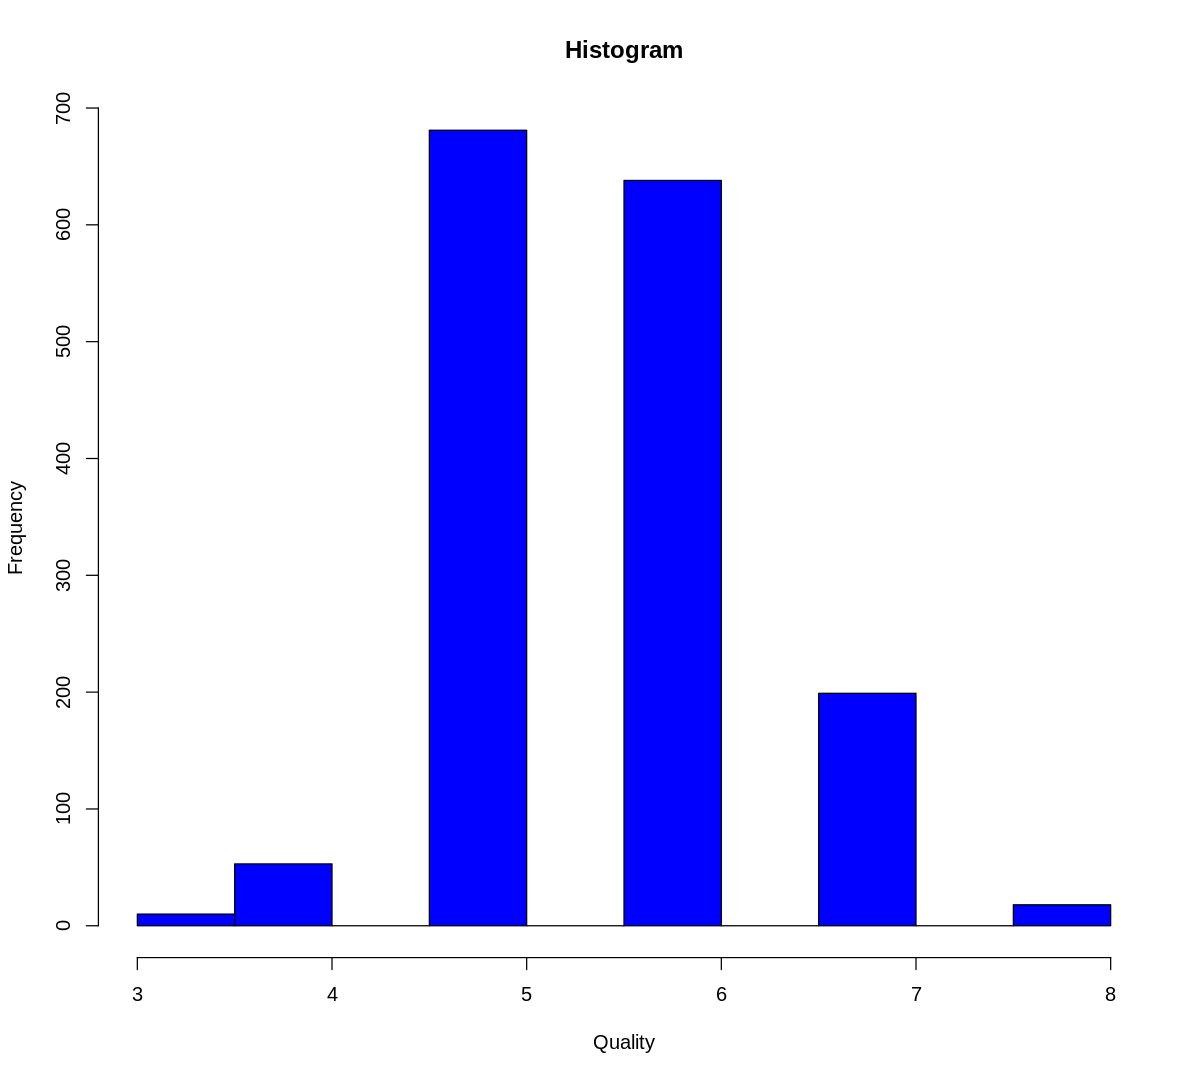

In [17]:
#Distribution of quality
options(repr.plot.width = 9, repr.plot.height = 6)
hist(wine_red$quality, col = "blue", main = "The Distribution of Wine Quality", 
     xlab = "Wine Quality", ylab = "Count")

In [ ]:
>From the histogram, the majority of wine were distributed in quality 5 and 6.

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


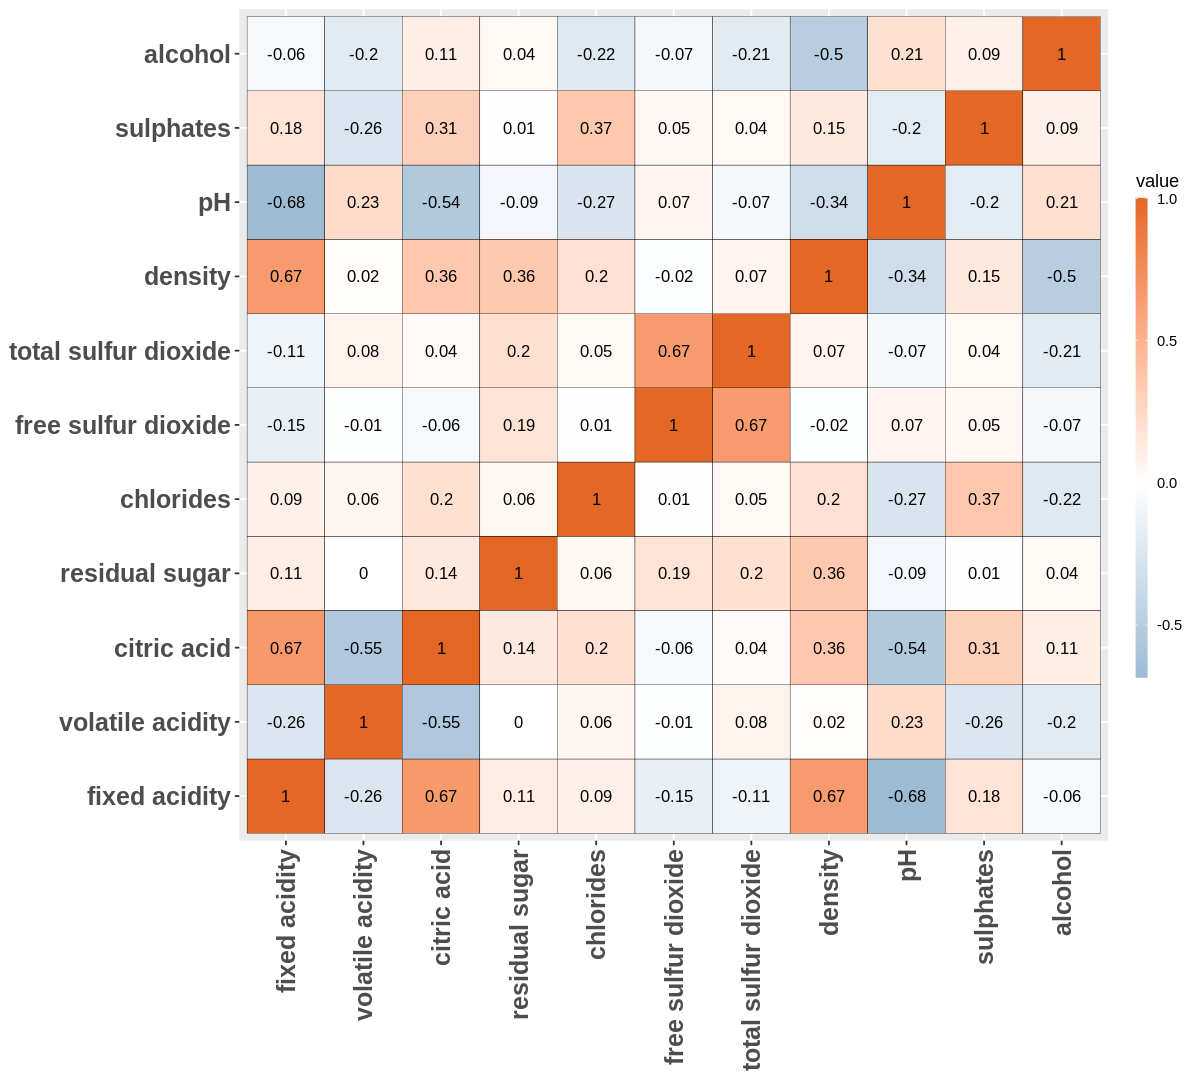

In [18]:
cor_matrix = cor(subset(wine_red, select = -c(quality)))
melted = melt(cor_matrix)

options(repr.plot.width = 10, repr.plot.height = 9)

ggplot(melted)+
    geom_tile(aes(X1, X2, fill = value), colour = "black")+
    geom_text(aes(X1, X2, label = round(value, 2)), colour = "black", size = 3.5)+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
          axis.text = element_text(size = 15, face = "bold"),
          axis.title = element_blank()) +
    scale_fill_gradient2(low = "#6D9EC1", high = "#E46726")+
    guides(fill = guide_colourbar(barwidth = 0.5, barheight = 20))

By calling cor() and melt() function, we are able to visualize the correlation matrix, displaying the pairwise correlations between variables in the wine dataset that does not include the response variable (quality).

### Methods: Plan

First, the data will be split into training and testing subset with 70% of the data in the training set and 30% in the testing set. A seed using the number 301 will be used for reproducible results.

In [19]:
#Create training/testing splits of data
set.seed(301)
wine_split <- initial_split(wine_red, prop = 0.70, strata = quality)
training_wine <- training(wine_split)
testing_wine <- testing(wine_split)
head(training_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
6.7,0.580,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
5.6,0.615,0.00,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5


### Implement Least square linear model with backward selection

In [20]:
library(leaps)
wine_backward_sel <- regsubsets(
  quality ~ .,  # Replace 'quality' with your actual response variable
  data = training_wine,
  nvmax = ncol(training_wine) - 1,  # Assuming all other columns are predictors
  method = "backward"
)

# View the results
wine_backward_sel

Subset selection object
Call: regsubsets.formula(quality ~ ., data = training_wine, nvmax = ncol(training_wine) - 
    1, method = "backward")
11 Variables  (and intercept)
                       Forced in Forced out
`fixed acidity`            FALSE      FALSE
`volatile acidity`         FALSE      FALSE
`citric acid`              FALSE      FALSE
`residual sugar`           FALSE      FALSE
chlorides                  FALSE      FALSE
`free sulfur dioxide`      FALSE      FALSE
`total sulfur dioxide`     FALSE      FALSE
density                    FALSE      FALSE
pH                         FALSE      FALSE
sulphates                  FALSE      FALSE
alcohol                    FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: backward

In [21]:
wine_bwd_summary <- summary(wine_backward_sel)

# Creating a dataframe with the summary metrics
wine_bwd_summary_df <- data.frame(
    n_input_variables = 1:(ncol(training_wine) - 1),
    RSQ = wine_bwd_summary$rsq,
    RSS = wine_bwd_summary$rss,
    ADJ.R2 = wine_bwd_summary$adjr2
)

# View the summary dataframe
wine_bwd_summary_df

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.2267731,571.3933,0.2260796
2,0.3118560,508.5193,0.3106206
3,0.3432114,485.3486,0.3414410
4,0.3490063,481.0662,0.3466646
5,0.3563986,475.6036,0.3535021
6,0.3644191,469.6766,0.3609835
7,0.3660317,468.4850,0.3620301
8,0.3669389,467.8146,0.3623681
9,0.3674555,467.4328,0.3623129


In [22]:
wine_bwd_summary

Subset selection object
Call: regsubsets.formula(quality ~ ., data = training_wine, nvmax = ncol(training_wine) - 
    1, method = "backward")
11 Variables  (and intercept)
                       Forced in Forced out
`fixed acidity`            FALSE      FALSE
`volatile acidity`         FALSE      FALSE
`citric acid`              FALSE      FALSE
`residual sugar`           FALSE      FALSE
chlorides                  FALSE      FALSE
`free sulfur dioxide`      FALSE      FALSE
`total sulfur dioxide`     FALSE      FALSE
density                    FALSE      FALSE
pH                         FALSE      FALSE
sulphates                  FALSE      FALSE
alcohol                    FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: backward
          `fixed acidity` `volatile acidity` `citric acid` `residual sugar`
1  ( 1 )  " "             " "                " "           " "             
2  ( 1 )  " "             "*"                " "           " "             
3  ( 1 ) 

#### The model with 10 variables (n_input_variables = 10) seems to be a good candidate. It has a relatively high Adjusted R-squared and includes Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,pH,Sulphates,Alcohol

In [42]:
training_wine_back <- training_wine %>% select(-density)
back_sel_model <- lm(quality ~ ., data = training_wine_back)
ols_model <- lm(quality ~ ., data = training_wine)

set.seed(301)

#CV for OLS and backward selection models
train_control <- trainControl(method = "cv", number = 5)
cv_ols_model <- train(quality ~ ., data = training_wine, method = "lm", trControl = train_control)
training_wine_back <- training_wine %>% select(-density)
cv_back_model <- train(quality ~ ., data = training_wine_back, method = "lm", trControl = train_control)

#CV for ridge regression
model_Y_matrix  <- as.matrix(training_wine$quality)
model_X_matrix <- model.matrix(~ ., data = training_wine %>% select(-quality))
cv_ridge_model <- cv.glmnet(x = model_X_matrix, y = model_Y_matrix, alpha = 1, nfolds = 5)

#MSE of CV results
data.frame(Model = c("OLS", "Backward Selection", "Ridge Regression"),
           MSE = c(cv_ols_model$results$RMSE^2,cv_back_model$results$RMSE^2, min(cv_ridge_model$cvm)))

Model,MSE
<chr>,<dbl>
OLS,0.4250898
Backward Selection,0.4315696
Ridge Regression,0.4277394


In [24]:
#Using test dataset for the result:
#predictions <- predict(final_model, newdata = test)
#mse <- mean((test$quality - predictions)^2)
#rmse <- sqrt(mse)